In [3]:
# 표준 라이브러리
import sys
from pathlib import Path

# 로컬 모듈
sys.path.append(str(Path.cwd().parent))
from utils import TTest

In [4]:
import pandas as pd
import numpy as np
from scipy import stats

In [5]:
milk = pd.read_csv('../../data/interim/milk.csv')

In [6]:
milk.head()

,농장아이디,개체번호,검정일자,누적착유일(연계),유지방율,유단백,무지고형분,체세포수,MUN,305일유량,...,농후사료급여량(연계),공태일수,유량,질병군,우유등급,비유최고도달일수_log,건유전마지막유량_log,공태일수_log,출생년도,PF비
0,21133,2.007121e+13,2021-03-18,445,6.60,3.28,8.87,274,11.6,15158.0,...,0.0,619,76169939,0,2등급이하,4.143135,4.330733,6.429719,2007,0.496970
1,21133,2.007121e+13,2021-04-28,486,3.64,3.33,8.91,166,11.0,15158.0,...,0.0,619,76170244,0,1등급,4.143135,4.330733,6.429719,2007,0.914835
2,21133,2.007121e+13,2021-05-20,508,2.61,3.35,9.14,156,10.8,15158.0,...,0.0,619,76170487,0,1등급,4.143135,4.330733,6.429719,2007,1.283525
3,21133,2.007121e+13,2021-06-25,544,3.75,3.49,8.99,307,14.1,15158.0,...,0.0,619,76170734,0,2등급이하,4.143135,4.330733,6.429719,2007,0.930667
4,21133,2.007121e+13,2021-07-07,556,3.68,3.74,9.31,34,16.2,15158.0,...,0.0,619,76170903,0,1등급,4.143135,4.330733,6.429719,2007,1.016304


In [7]:
ttest = TTest()

In [8]:
milk_0 = milk[milk['질병군'] == 0]
milk_1 = milk[milk['질병군'] == 1]

In [9]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='AppleGothic')  # Mac 기본 한글 폰트
plt.rc('axes', unicode_minus=False)   # 마이너스 기호 깨짐 방지


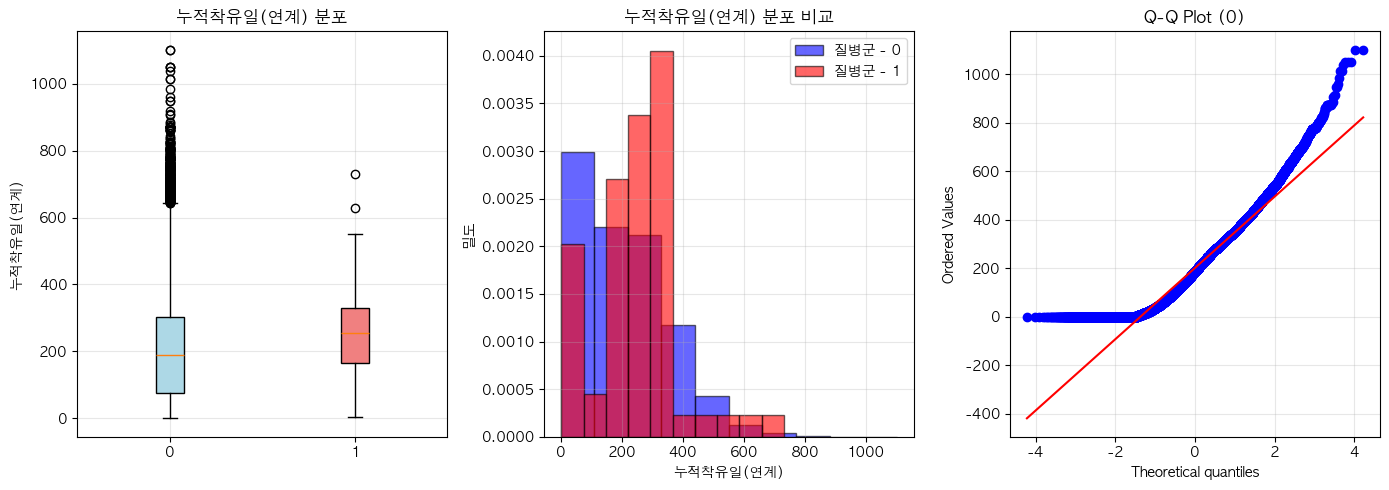


[등분산성 검정]
----------------------------------------
0.20199936136437963
Levene's test p-value: 0.2020

[데이터 정규성 검정] n=58380
----------------------------------------
왜도(Skewness): 0.682
첨도(Kurtosis): 0.308
결과: ✅ 정규분포 가정 충족 (|왜도|<2 (중심극한정리))

[데이터 정규성 검정] n=61
----------------------------------------
왜도(Skewness): 0.548
첨도(Kurtosis): 1.190
결과: ✅ 정규분포 가정 충족 (|왜도|<1, |첨도|<2)

[가설검정]
----------------------------------------
H₀: μ₀ = μ₁ (두 클래스의 평균이 같다)
H₁: μ₀ ≠ μ₁ (두 클래스의 평균이 다르다)
유의수준: α = 0.05

Student's t-test 결과:
t = -2.5239, p = 0.0116
Cohen's d = -0.328 (작은 효과)

[결론]
✅ p-value(0.0116) < 0.05 → 귀무가설 기각
   두 클래스에 유의한 차이가 있음


{'test_name': "Student's t-test",
 'statistic': np.float64(-2.523917725368376),
 'p_value': np.float64(0.01160813582033117),
 'effect_size': np.float64(-0.3275315788009731),
 'effect_interpretation': '작은 효과',
 'conclusion': '✅ p-value(0.0116) < 0.05 → 귀무가설 기각\n   두 클래스에 유의한 차이가 있음',
 'metadata': None}

In [10]:
result = ttest.execute(milk_0['누적착유일(연계)'], milk_1['누적착유일(연계)'], '질병군', '누적착유일(연계)')
result.to_dict()

In [11]:
milk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58441 entries, 0 to 58440
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   농장아이디         58441 non-null  int64  
 1   개체번호          58441 non-null  float64
 2   검정일자          58441 non-null  object 
 3   누적착유일(연계)     58441 non-null  int64  
 4   유지방율          42084 non-null  float64
 5   유단백           42084 non-null  float64
 6   무지고형분         42084 non-null  float64
 7   체세포수          58441 non-null  int64  
 8   MUN           42084 non-null  float64
 9   305일유량        43678 non-null  float64
 10  305일유지량       43678 non-null  float64
 11  305일유단백       43678 non-null  float64
 12  305일무지고형분     43678 non-null  float64
 13  성년유량          43678 non-null  float64
 14  성년유지량         43678 non-null  float64
 15  성년유단백량        43678 non-null  float64
 16  성년무지고형분량      43678 non-null  float64
 17  전산차비유지속성      58440 non-null  float64
 18  현재산차비유지속성     58440 non-nu

In [12]:
milk['출생년도'].value_counts()

출생년도
2017    14483
2018    13544
2016    10951
2015     6150
2014     4258
2019     4045
2013     2519
2012     1324
2011      648
2009      197
2010      197
2008       71
2006       25
2020       20
2007        9
Name: count, dtype: int64

In [13]:
# 필수 라이브러리 Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency, chisquare, fisher_exact
from scipy.stats import chi2
import warnings
import platform

warnings.filterwarnings('ignore')

# 운영체제별 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
else:  # Linux
    plt.rcParams['font.family'] = 'NanumGothic'

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 시각화 기본 설정
plt.rcParams['figure.figsize'] = (12, 4)

# 전역 시드 설정
np.random.seed(42)

print("="*50)
print("라이브러리 로드 완료!")
print("한글 폰트 설정 완료!")
print("="*50)

라이브러리 로드 완료!
한글 폰트 설정 완료!


In [14]:
def cramers_v(chi2_stat, n, r, c):
    """
    Cramér's V 효과 크기 계산
    
    카이제곱 검정의 효과 크기를 측정하는 지표로, 두 범주형 변수 간
    연관성의 강도를 0~1 사이 값으로 표현합니다.
    
    Parameters
    ----------
    chi2_stat : float
        카이제곱 통계량 (χ²)
    n : int
        전체 표본 수 (분할표의 총합)
    r : int
        행(row)의 개수
    c : int
        열(column)의 개수
    
    Returns
    -------
    float
        Cramér's V 값 (0~1 사이)
        - 0에 가까울수록: 독립적 (연관성 없음)
        - 1에 가까울수록: 강한 연관성
    """
    return np.sqrt(chi2_stat / (n * min(r-1, c-1)))


def interpret_cramers_v(v):
    """
    Cramér's V 값 해석
    
    Parameters
    ----------
    v : float
        Cramér's V 값 (0~1)
    
    Returns
    -------
    str
        연관성 강도 해석
        
    """
    if v < 0.1:
        return "매우 약한 관계"
    elif v < 0.3:
        return "약한 관계"
    elif v < 0.5:
        return "중간 관계"
    else:
        return "강한 관계"


def check_expected_frequencies(contingency_table):
    """
    카이제곱 검정의 기대빈도 가정 확인
    
    카이제곱 검정을 수행하기 전에 기대빈도가 충분한지 검사합니다.
    기대빈도가 너무 작으면 카이제곱 검정의 정확도가 떨어집니다.
    
    Parameters
    ----------
    contingency_table : array-like
        분할표 (관측 빈도)
    
    Returns
    -------
    bool
        카이제곱 검정 사용 가능 여부
        - True: 카이제곱 검정 사용 가능
        - False: Fisher's exact test 권장
    
    검정 기준
    ---------
    1. 모든 기대빈도 ≥ 5 (이상적)
    2. 기대빈도 < 5인 셀이 전체의 20% 이하 (허용 가능)
    
    Notes
    -----
    - 2×2 분할표에서 기대빈도 < 5인 경우: Fisher's exact test 필수
    - 큰 분할표에서 일부 셀만 < 5: 카이제곱 검정 여전히 사용 가능
    """
    # 카이제곱 검정으로 기대빈도 계산
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    
    print("\n[기대빈도 확인]")
    print("-"*40)
    
    # -------------------------------------------------------------------------
    # 1. 최소 기대빈도 확인
    # -------------------------------------------------------------------------
    min_expected = expected.min()
    print(f"최소 기대빈도: {min_expected:.2f}")
    
    # -------------------------------------------------------------------------
    # 2. 기대빈도 < 5인 셀의 비율 계산
    # -------------------------------------------------------------------------
    cells_below_5 = (expected < 5).sum()  # 5 미만인 셀 개수
    total_cells = expected.size  # 전체 셀 개수
    percent_below_5 = (cells_below_5 / total_cells) * 100
    
    print(f"5 미만 셀: {cells_below_5}/{total_cells} ({percent_below_5:.1f}%)")
    
    # -------------------------------------------------------------------------
    # 3. 카이제곱 검정 적합성 판단
    # -------------------------------------------------------------------------
    # 조건: 최소 기대빈도 ≥ 5 AND 5 미만 셀 비율 ≤ 20%
    if min_expected < 5 or percent_below_5 > 20:
        print("⚠️ 주의: Fisher's exact test 사용 권장")
        print("   (기대빈도가 너무 작아 카이제곱 검정 부정확)")
        return False
    else:
        print("✅ 카이제곱검정 사용 가능")
        return True


def standardized_residuals(observed, expected):
    """
    표준화 잔차 계산
    
    각 셀의 관측값과 기대값의 차이를 표준화하여 어느 셀이
    독립성 가정에서 크게 벗어나는지 파악합니다.
    
    Parameters
    ----------
    observed : array-like
        관측 빈도 (분할표)
    expected : array-like
        기대 빈도 (chi2_contingency의 결과)
    
    Returns
    -------
    array
        표준화 잔차 행렬
        
    해석
    ----
    - |잔차| > 2: 해당 셀이 독립성에서 유의하게 벗어남
    - |잔차| > 3: 매우 강한 연관성 (이상치 수준)
    - 양수: 관측값이 기대값보다 큼 (과대 표현)
    - 음수: 관측값이 기대값보다 작음 (과소 표현)
    """
    return (observed - expected) / np.sqrt(expected)

In [15]:
groups = ['농후사료급여량(연계)', '농후사료비(연계)', '산차']

for group in groups:
    df = milk[['질병군', group]]
    
    # 교차표
    contingency_table = pd.crosstab(df['질병군'], df[group])

    # 기대빈도 확인
    is_valid = check_expected_frequencies(contingency_table)
    
    # 카이제곱 검정
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    
    n = contingency_table.values.sum()  # 전체 표본 수
    r, c = contingency_table.shape      # 행수, 열수
    v = cramers_v(chi2_stat, n, r, c)
    
    # 기대빈도 테이블
    expected_df = pd.DataFrame(
        expected, 
        index=contingency_table.index,
        columns=contingency_table.columns
    )
    print("\n[기대빈도]")
    display(expected_df.round(2))

    # 표준화 잔차
    std_residuals = standardized_residuals(contingency_table.values, expected)
    residuals_df = pd.DataFrame(
        std_residuals,
        index=contingency_table.index,
        columns=contingency_table.columns
    )
    print("\n[표준화 잔차]")
    display(residuals_df.round(2))
    print("(|잔차| > 2: 유의한 차이, |잔차| > 3: 매우 강한 연관성)")
    
    # 결과 요약
    print("\n[결론]")
    if p_value < 0.05:
        print(f"✅ p-value({p_value:.4f}) < 0.05 → 귀무가설 기각")
        print("   질병군과", group, "은(는) 관련이 있음")
        print(f"   효과 크기: {interpret_cramers_v(v)}")
        
        # 사후분석
        print("\n[사후분석]")
        print("   표준화 잔차 |값| > 2인 셀 해석:")
        for i, row_label in enumerate(contingency_table.index):
            for j, col_label in enumerate(contingency_table.columns):
                if abs(std_residuals[i, j]) > 2:
                    if std_residuals[i, j] > 0:
                        print(f"   • {row_label} - {col_label}: 예상보다 많음 (잔차={std_residuals[i, j]:.2f})")
                    else:
                        print(f"   • {row_label} - {col_label}: 예상보다 적음 (잔차={std_residuals[i, j]:.2f})")
    else:
        print(f"❌ p-value({p_value:.4f}) ≥ 0.05 → 귀무가설 채택")
        print("   질병군과", group, "은(는) 독립적임 (연관 없음)")



[기대빈도 확인]
----------------------------------------
최소 기대빈도: 15.95
5 미만 셀: 0/4 (0.0%)
✅ 카이제곱검정 사용 가능

[기대빈도]


농후사료급여량(연계),0.0,1.0
질병군,,
0,43111.95,15268.05
1,45.05,15.95



[표준화 잔차]


농후사료급여량(연계),0.0,1.0
질병군,,
0,0.10,-0.17
1,-3.14,5.27


(|잔차| > 2: 유의한 차이, |잔차| > 3: 매우 강한 연관성)

[결론]
✅ p-value(0.0000) < 0.05 → 귀무가설 기각
   질병군과 농후사료급여량(연계) 은(는) 관련이 있음
   효과 크기: 매우 약한 관계

[사후분석]
   표준화 잔차 |값| > 2인 셀 해석:
   • 1 - 0.0: 예상보다 적음 (잔차=-3.14)
   • 1 - 1.0: 예상보다 많음 (잔차=5.27)

[기대빈도 확인]
----------------------------------------
최소 기대빈도: 11.53
5 미만 셀: 0/4 (0.0%)
✅ 카이제곱검정 사용 가능

[기대빈도]


농후사료비(연계),0.0,1.0
질병군,,
0,47340.53,11039.47
1,49.47,11.53



[표준화 잔차]


농후사료비(연계),0.0,1.0
질병군,,
0,0.04,-0.09
1,-1.35,2.79


(|잔차| > 2: 유의한 차이, |잔차| > 3: 매우 강한 연관성)

[결론]
✅ p-value(0.0034) < 0.05 → 귀무가설 기각
   질병군과 농후사료비(연계) 은(는) 관련이 있음
   효과 크기: 매우 약한 관계

[사후분석]
   표준화 잔차 |값| > 2인 셀 해석:
   • 1 - 1.0: 예상보다 많음 (잔차=2.79)

[기대빈도 확인]
----------------------------------------
최소 기대빈도: 0.01
5 미만 셀: 6/20 (30.0%)
⚠️ 주의: Fisher's exact test 사용 권장
   (기대빈도가 너무 작아 카이제곱 검정 부정확)

[기대빈도]


산차,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
질병군,,,,,,,,,,
0,21147.52,15066.27,8795.23,5354.05,2745.95,1065.82,484.46,184.79,74.92,11.99
1,23.48,16.73,9.77,5.95,3.05,1.18,0.54,0.21,0.08,0.01



[표준화 잔차]


산차,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
질병군,,,,,,,,,,
0,0.07,-0.00,-0.02,-0.07,-0.02,-0.06,0.02,0.02,0.01,0.00
1,-1.96,0.07,0.71,2.07,0.54,1.67,-0.73,-0.45,-0.29,-0.12


(|잔차| > 2: 유의한 차이, |잔차| > 3: 매우 강한 연관성)

[결론]
❌ p-value(0.1826) ≥ 0.05 → 귀무가설 채택
   질병군과 산차 은(는) 독립적임 (연관 없음)
